## Import Libraries and Dependencies

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

In [54]:
# Load dataset
data = pd.read_csv('advertising.csv')

## Data Exploration

In [55]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [57]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Visualization

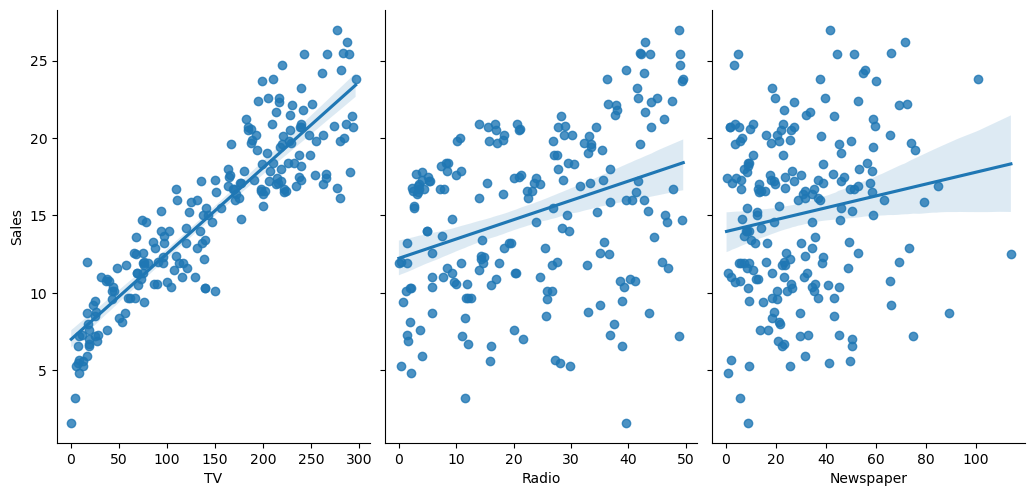

In [58]:
# Pairplot to visualize relationships between features and sales
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7, kind='reg')
plt.show()

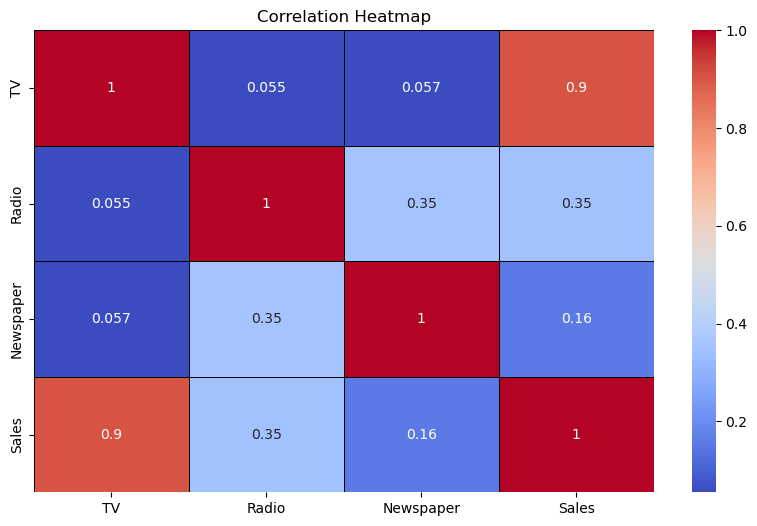

In [59]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

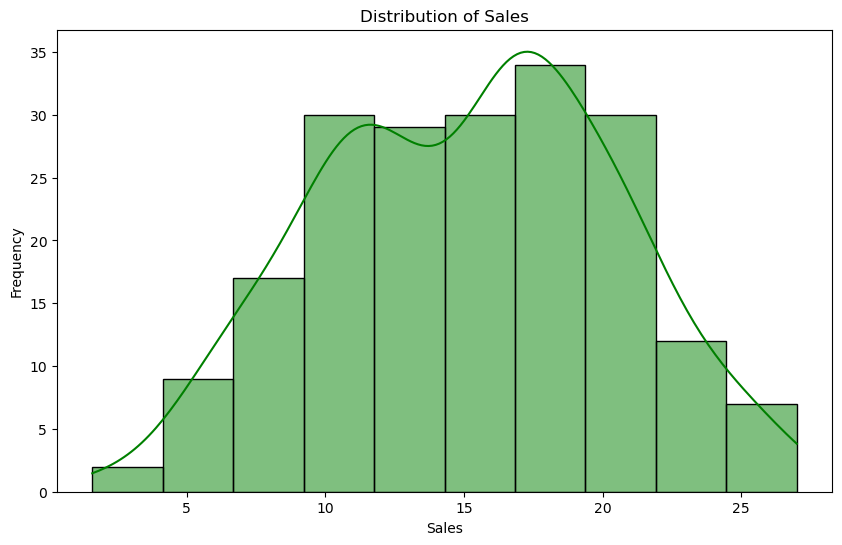

In [60]:
# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], kde=True, color='green')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

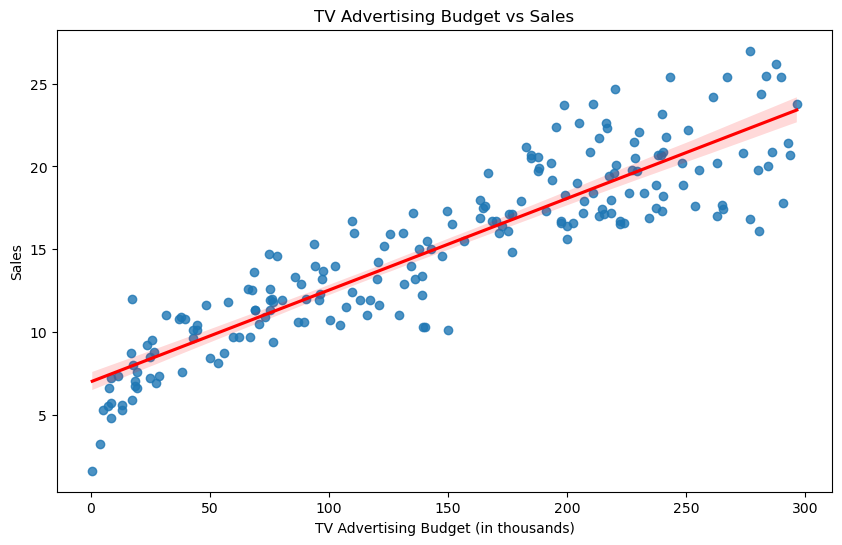

In [61]:
# Scatter plot with regression line for TV vs Sales
plt.figure(figsize=(10, 6))
sns.regplot(x=data['TV'], y=data['Sales'], line_kws={'color': 'red'})
plt.title('TV Advertising Budget vs Sales')
plt.xlabel('TV Advertising Budget (in thousands)')
plt.ylabel('Sales')
plt.show()

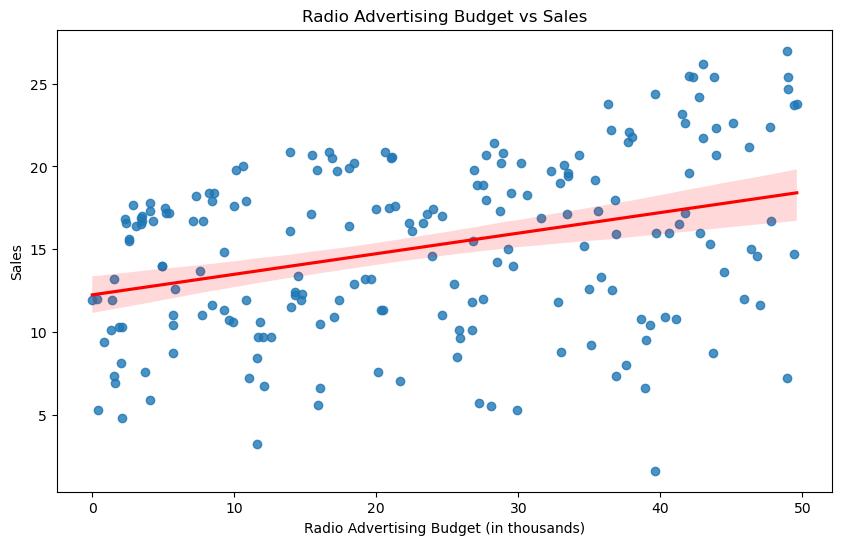

In [62]:
# Scatter plot with regression line for Radio vs Sales
plt.figure(figsize=(10, 6))
sns.regplot(x=data['Radio'], y=data['Sales'], line_kws={'color': 'red'})
plt.title('Radio Advertising Budget vs Sales')
plt.xlabel('Radio Advertising Budget (in thousands)')
plt.ylabel('Sales')
plt.show()

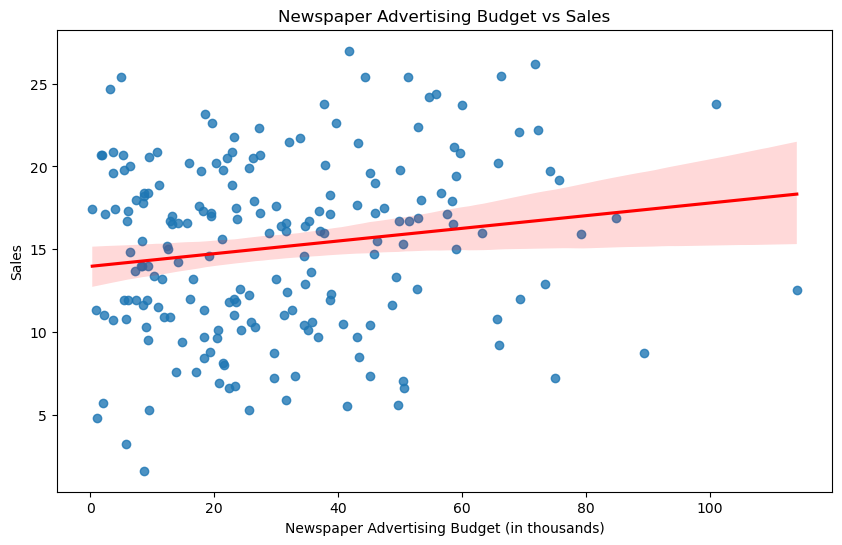

In [63]:
# Scatter plot with regression line for Newspaper vs Sales
plt.figure(figsize=(10, 6))
sns.regplot(x=data['Newspaper'], y=data['Sales'], line_kws={'color': 'red'})
plt.title('Newspaper Advertising Budget vs Sales')
plt.xlabel('Newspaper Advertising Budget (in thousands)')
plt.ylabel('Sales')
plt.show()

In [64]:
# Splitting data into features and target
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [65]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [67]:
# Linear Regression Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
accuracy_lr = r2_lr * 100

In [68]:
print("Mean Squared Error (Linear Regression):", mse_lr)
print("Mean Absolute Error (Linear Regression):", mae_lr)
print("Mean Absolute Percentage Error (Linear Regression):", mape_lr)
print("R-squared (Linear Regression):", r2_lr)
print("Accuracy (Linear Regression):", accuracy_lr, "%")

Mean Squared Error (Linear Regression): 2.907756910271091
Mean Absolute Error (Linear Regression): 1.274826210954934
Mean Absolute Percentage Error (Linear Regression): 0.10880888971170641
R-squared (Linear Regression): 0.9059011844150826
Accuracy (Linear Regression): 90.59011844150827 %


In [69]:
# Decision Tree Regressor Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [70]:
# Decision Tree Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
accuracy_dt = r2_dt * 100

In [71]:
print("Mean Squared Error (Decision Tree):", mse_dt)
print("Mean Absolute Error (Decision Tree):", mae_dt)
print("Mean Absolute Percentage Error (Decision Tree):", mape_dt)
print("R-squared (Decision Tree):", r2_dt)
print("Accuracy (Decision Tree):", accuracy_dt, "%")

Mean Squared Error (Decision Tree): 3.4019999999999997
Mean Absolute Error (Decision Tree): 1.24
Mean Absolute Percentage Error (Decision Tree): 0.11478048363717792
R-squared (Decision Tree): 0.8899068317956319
Accuracy (Decision Tree): 88.99068317956319 %


In [72]:
# Random Forest Regressor Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Random Forest Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
accuracy_rf = r2_rf * 100

In [73]:
print("Mean Squared Error (Random Forest):", mse_rf)
print("Mean Absolute Error (Random Forest):", mae_rf)
print("Mean Absolute Percentage Error (Random Forest):", mape_rf)
print("R-squared (Random Forest):", r2_rf)
print("Accuracy (Random Forest):", accuracy_rf, "%")

Mean Squared Error (Random Forest): 1.4374328500000009
Mean Absolute Error (Random Forest): 0.9179999999999993
Mean Absolute Percentage Error (Random Forest): 0.07635338071423345
R-squared (Random Forest): 0.9534827934927883
Accuracy (Random Forest): 95.34827934927883 %
